In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dimensionality Reduction

### PCA

In [2]:
from sklearn.decomposition import PCA

We always want to look at the head first. Get to know your data.

In [ ]:
heart_disease = pd.read_csv('Heart_disease_cleveland_new.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland/

![image.png](attachment:image.png)

### Task
Visualize the dataset in a low-dimensional feature space (two dimensions)


In [ ]:
X_heart = heart_disease.drop('target', axis=1)
y_heart = heart_disease['target']

In [ ]:
X_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1


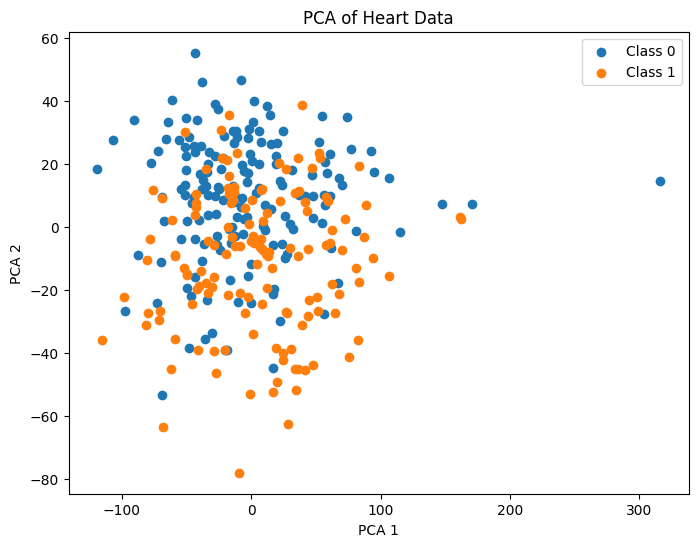

In [ ]:
# apply PCA
pca = PCA(n_components=2)
X_heart_pca = pca.fit_transform(X_heart)
# plot the data
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_heart contains class labels
classes = np.unique(y_heart)

plt.figure(figsize=(8, 6))
for cls in classes:
    plt.scatter(
        X_heart_pca[y_heart == cls, 0],
        X_heart_pca[y_heart == cls, 1],
        label=f'Class {cls}'
    )

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Heart Data')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_heart_standardized = X_heart.copy()
X_heart_standardized[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(X_heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
X_heart_standardized.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948726,1,0,0.757525,-0.264900,1,2,0.017197,0,1.087338,2,0,2
1,1.392002,1,3,1.611220,0.760415,0,2,-1.821905,1,0.397182,1,3,1
2,1.392002,1,3,-0.665300,-0.342283,0,2,-0.902354,1,1.346147,1,2,3
3,-1.932564,1,2,-0.096170,0.063974,0,0,1.637359,0,2.122573,2,0,1
4,-1.489288,0,1,-0.096170,-0.825922,0,2,0.980537,0,0.310912,0,0,1


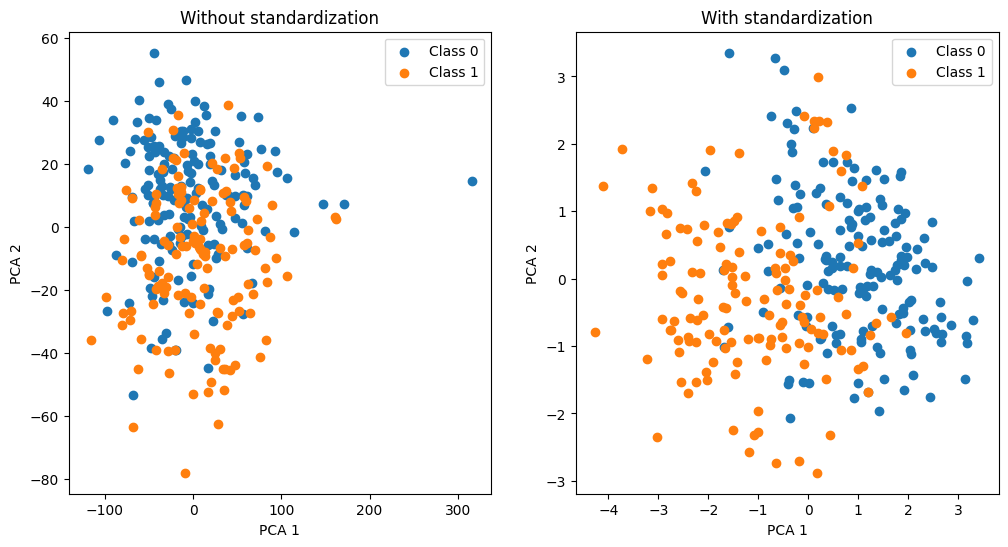

In [ ]:
# apply PCA
pca = PCA(n_components=2)
X_heart_pca = pca.fit_transform(X_heart)
X_heart_pca_standardized = pca.fit_transform(X_heart_standardized)

# plot both
plt.figure(figsize=(12,6))
plt.subplot(121)
for cls in classes:
    plt.scatter(
        X_heart_pca[y_heart == cls, 0],
        X_heart_pca[y_heart == cls, 1],
        label=f'Class {cls}'
    )
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Without standardization')
plt.legend()
plt.subplot(122)
for cls in classes:
    plt.scatter(
        X_heart_pca_standardized[y_heart == cls, 0],
        X_heart_pca_standardized[y_heart == cls, 1],
        label=f'Class {cls}'
    )
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('With standardization')
plt.legend()
plt.show()

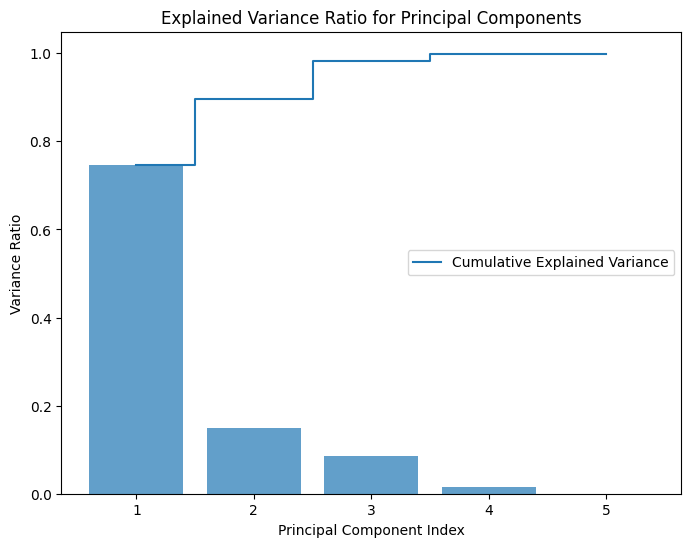

In [ ]:
# Plot the explained variance ratio
pca = PCA(n_components=5)
X_heart_pca = pca.fit_transform(X_heart)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.legend()
plt.show()

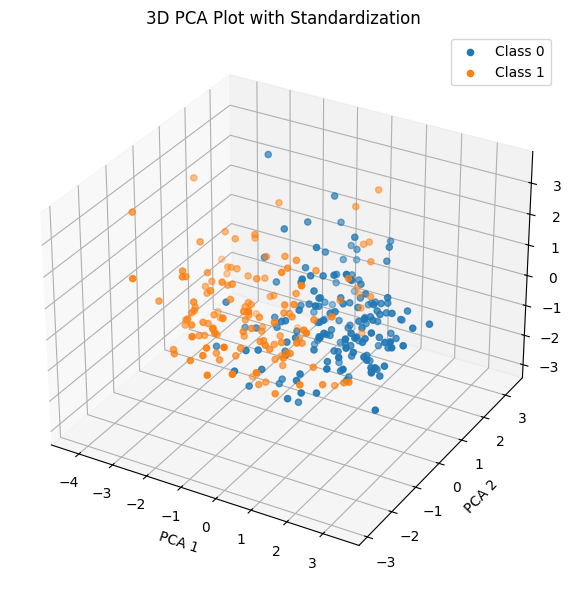

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Apply PCA for 3 components
pca = PCA(n_components=3)
X_heart_pca_standardized = pca.fit_transform(X_heart_standardized)

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for cls in classes:
    ax.scatter(
        X_heart_pca_standardized[y_heart == cls, 0],
        X_heart_pca_standardized[y_heart == cls, 1],
        X_heart_pca_standardized[y_heart == cls, 2],
        label=f'Class {cls}'
    )

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D PCA Plot with Standardization')
ax.legend()

plt.tight_layout()
plt.show()

We can also calculate the PCA manually

In [ ]:
def get_cov_matrix(X):
    X_mean = np.mean(X, axis=0)
    X = X - X_mean
    cov_matrix = np.dot(X.T, X) / (X.shape[0] - 1)
    return cov_matrix

def get_cov_matrix_np(X):
    cov_matrix = np.cov(X.T)
    return cov_matrix

cov_mat = get_cov_matrix(X_heart)
cov_mat_np = get_cov_matrix_np(X_heart)

np.allclose(cov_mat, cov_mat_np)

True

In [ ]:
def get_eigen(cov_matrix):
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
    return eigen_values, eigen_vectors

eigen_values, eigen_vectors = get_eigen(cov_mat)
print(eigen_values)
print(eigen_vectors.shape)

[2.69068602e+03 5.40701379e+02 3.06753643e+02 5.81107038e+01
 1.56334097e+00 9.42146130e-01 8.67582990e-01 6.30014184e-01
 6.56680786e-01 2.13513557e-01 1.15389471e-01 1.71232256e-01
 1.45785469e-01]
(13, 13)


Now lets create our pairs. As we can see we have a eigenvalue with its corresponding eigenvector. Eigenvalue shows how much information we have in the eigenvector.

In [ ]:
def get_sorted_eig_pairs(eigen_values, eigen_vectors):
    eigen_pairs = [(eigen_values[i], eigen_vectors[:, i]) for i in range(len(eigen_values))]
    return eigen_pairs

eigen_pairs = get_sorted_eig_pairs(eigen_values, eigen_vectors)
print(eigen_pairs[0])

(2690.6860247217182, array([ 3.84055004e-02, -1.80915547e-03,  1.34606278e-03,  5.04677953e-02,
        9.97968074e-01,  9.35392391e-05,  3.33949714e-03, -3.76007303e-03,
        5.74730338e-04,  1.15523103e-03, -3.30874086e-06,  2.30333633e-03,
        6.22906380e-04]))


### Explained variance:
- Statistical metric that measures the proportion of the total variance in a dataset that is captured or "explained" by a particular set of variables or components
- Explained variance by each principal component is represented by its corresponding eigenvalue
- Explained variance ratio for a principal component is the ratio of its eigenvalue to the sum of all eigenvalues
- Provides insights into the importance of each principal component. Components with higher explained variance are more influential in describing the underlying structure of the data
- A high cumulative explained variance suggests that the selected principal components effectively capture the variability in the data, allowing for meaningful dimensionality reduction

[74.70895777824704, 15.012987806983617, 8.517249796915403, 1.6134881885661394, 0.04340735912783938, 0.026159408714405398, 0.024089106049243206, 0.018233244861724146, 0.017492826224747418, 0.005928367411522336, 0.004754394698584945, 0.004047845182096813, 0.003203877017639132]


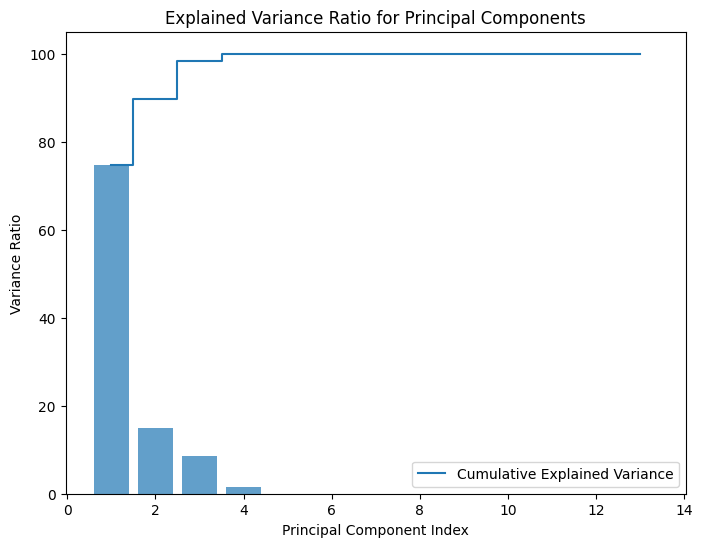

In [ ]:
def get_explained_variance(eigen_values):
    total = sum(eigen_values)
    explained_variance = [(i / total)*100 for i in sorted(eigen_values, reverse=True)]
    return explained_variance

explained_variance = get_explained_variance(eigen_values)
print(explained_variance)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.legend()
plt.show()

In [ ]:
def get_projection_matrix(eigen_pairs, n_components):
    projection_matrix = np.hstack([eigen_pairs[i][1].reshape(13, 1) for i in range(n_components)])
    return projection_matrix

projection_matrix = get_projection_matrix(eigen_pairs, 3)
print(projection_matrix.shape)

(13, 3)


In [ ]:
def get_PCA(X, n_components):
    cov_mat = get_cov_matrix(X)
    eigen_values, eigen_vectors = get_eigen(cov_mat)
    eigen_pairs = get_sorted_eig_pairs(eigen_values, eigen_vectors)
    projection_matrix = get_projection_matrix(eigen_pairs, 3)

    X_pca = np.dot(X, projection_matrix)

    return X_pca

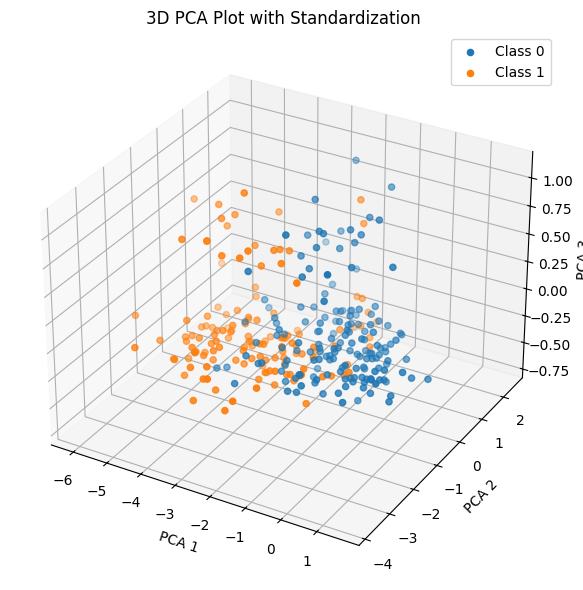

In [ ]:
X_heart_pca_standardized = get_PCA(X_heart_standardized, 3)

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for cls in classes:
    ax.scatter(
        X_heart_pca_standardized[y_heart == cls, 0],
        X_heart_pca_standardized[y_heart == cls, 1],
        X_heart_pca_standardized[y_heart == cls, 2],
        label=f'Class {cls}'
    )

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D PCA Plot with Standardization')
ax.legend()

plt.tight_layout()
plt.show()


###Lets plot in in a interactive code:

In [ ]:
import plotly.express as px
# Prepare the data for Plotly
data = pd.DataFrame({
    'PCA 1': X_heart_pca_standardized[:, 0],
    'PCA 2': X_heart_pca_standardized[:, 1],
    'PCA 3': X_heart_pca_standardized[:, 2],
    'Class': y_heart
})

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    data,
    x='PCA 1',
    y='PCA 2',
    z='PCA 3',
    color='Class',
    title='3D PCA Plot with Standardization'
)

fig.update_layout(scene=dict(
    xaxis_title='PCA 1',
    yaxis_title='PCA 2',
    zaxis_title='PCA 3'
))

fig.show()

### Use SVD for PCA instead of eigendecomposition

Singular Value Decomposition (SVD) is a fundamental matrix factorization technique

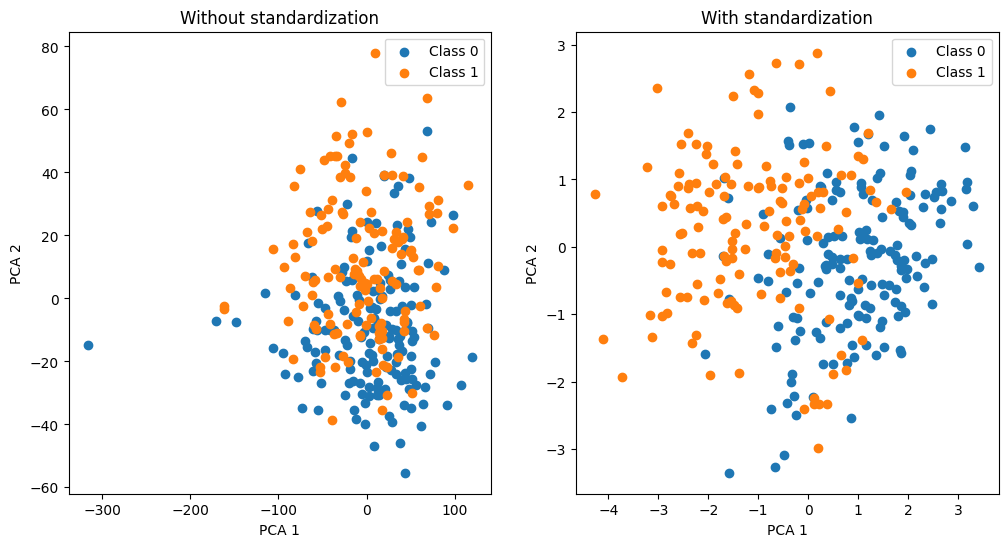

In [ ]:
def get_PCA_svd(X, n_components):
    X_mean = np.mean(X, axis=0)
    X = X - X_mean
    U, S, V = np.linalg.svd(X)
    X_pca = np.dot(X, V.T[:,:n_components])
    return X_pca

X_heart_pca = get_PCA_svd(X_heart, 2)
X_heart_pca_standardized = get_PCA_svd(X_heart_standardized, 2)

plt.figure(figsize=(12,6))
plt.subplot(121)
for cls in classes:
    plt.scatter(
        X_heart_pca[y_heart == cls, 0],
        X_heart_pca[y_heart == cls, 1],
        label=f'Class {cls}'
    )
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Without standardization')
plt.legend()
plt.subplot(122)
for cls in classes:
    plt.scatter(
        X_heart_pca_standardized[y_heart == cls, 0],
        X_heart_pca_standardized[y_heart == cls, 1],
        label=f'Class {cls}'
    )
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('With standardization')
plt.legend()
plt.show()

In [ ]:
from sklearn.manifold import TSNE

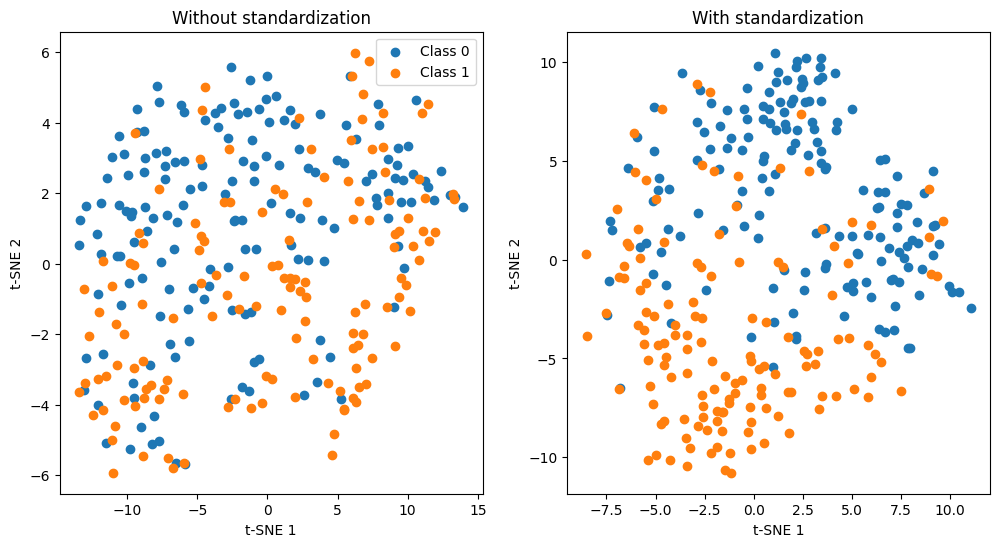

In [ ]:
# Create an instance of the TSNE class
tsne = TSNE(n_components=2, perplexity=50, random_state=42)

# Apply t-SNE to the data
X_tsne = tsne.fit_transform(X_heart)
X_tsne_standardized = tsne.fit_transform(X_heart_standardized)

plt.figure(figsize=(12,6))
plt.subplot(121)
for cls in classes:
    plt.scatter(
        X_tsne[y_heart == cls, 0],
        X_tsne[y_heart == cls, 1],
        label=f'Class {cls}'
    )
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Without standardization')
plt.legend()
plt.subplot(122)
for cls in classes:
    plt.scatter(
        X_tsne_standardized[y_heart == cls, 0],
        X_tsne_standardized[y_heart == cls, 1],
        label=f'Class {cls}'
    )
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('With standardization')
plt.show()


# Statistic

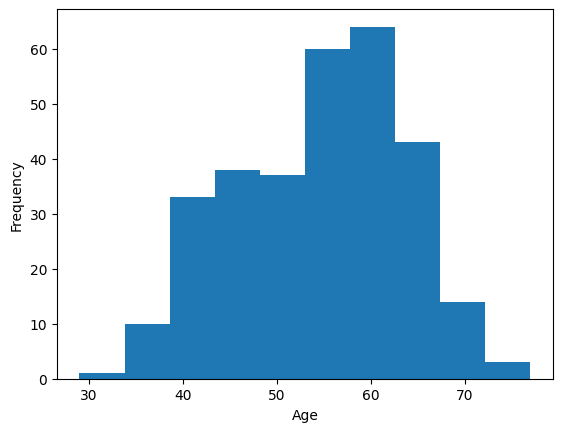

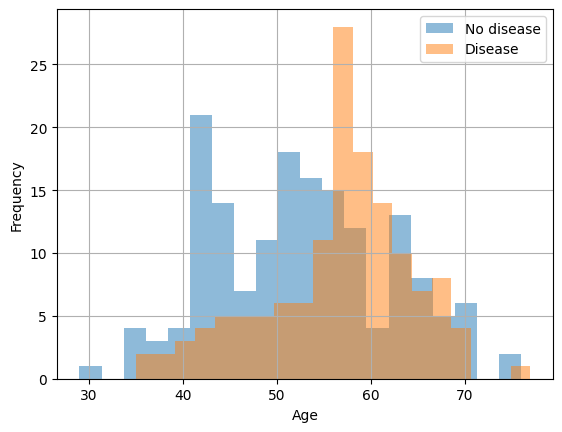

In [ ]:
# plot histograms
plt.hist(X_heart['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

heart_disease[heart_disease['target'] == 0]['age'].hist(alpha=0.5, bins=20)
heart_disease[heart_disease['target'] == 1]['age'].hist(alpha=0.5, bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['No disease', 'Disease'])
plt.show()

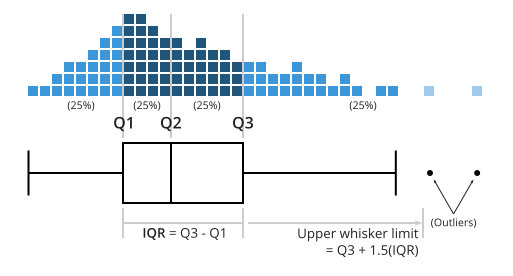

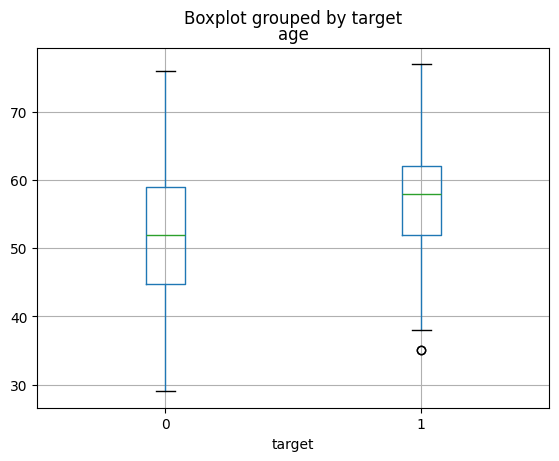

In [ ]:
heart_disease.boxplot(column='age', by='target')
plt.show()

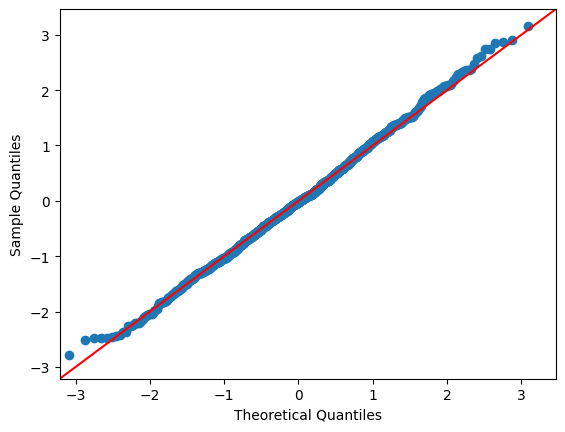

In [ ]:

import statsmodels.api as sm

# create dummy variables
test = np.random.normal(0, 1, 1000)

sm.qqplot(test, line='45')
plt.show()

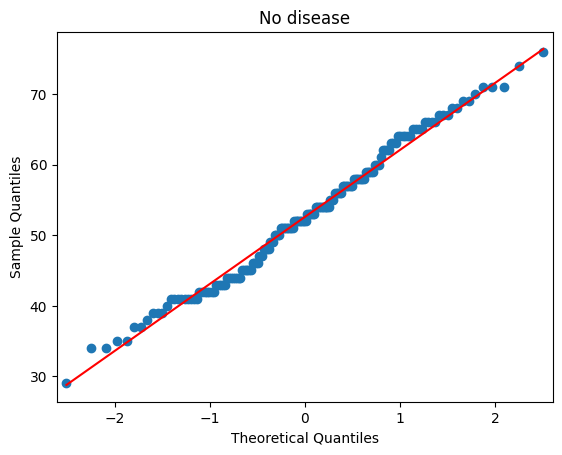

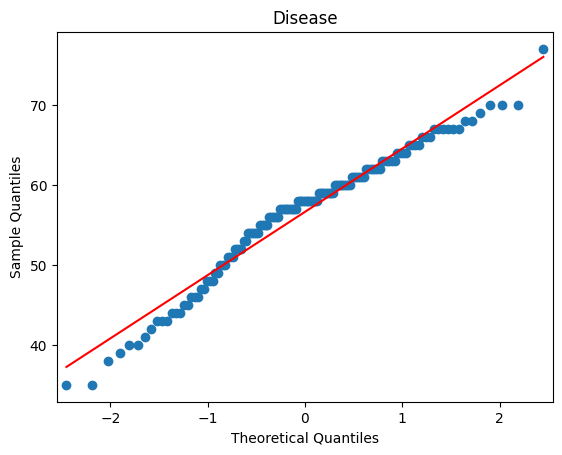

In [ ]:
# --> if the data is normally distributed, the points should be on the red line
sm.qqplot(heart_disease[heart_disease['target'] == 0]['age'], line='s')
plt.title('No disease')
sm.qqplot(heart_disease[heart_disease['target'] == 1]['age'], line='s')
plt.title('Disease')
plt.show()

### Assumptions:
- Data is approximately normally distributed
- The two groups are independent

(if the data would not be normally distributed or sample sizes are too small, we could use, for example, the Mann-Whitney U test (non-parametric))

In [ ]:
# H0: there is no difference in the mean age between patients with and without heart disease
# H1: there is a difference in the mean age between patients with and without heart disease

# perform a t-testst
# --> we use the t-test for independent samples because we have two independent groups (patients with and without heart disease)
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(heart_disease[heart_disease['target'] == 0]['age'],
                                 heart_disease[heart_disease['target'] == 1]['age'])
print('t-statistic: {}'.format(t_statistic))
print('p-value: {}'.format(p_value))

# check if significant
if p_value < 0.05:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')


t-statistic: -3.971100226293655
p-value: 8.955636917529706e-05
We reject the null hypothesis
